<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/DataCleaningwPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCDataCleaningWithPython/")
os.getcwd()


'/content/gdrive/My Drive/DCDataCleaningWithPython'

# Common Data Problems
### Data Type Constraints
Use assert statements to check corrections-takes up little space.

In [5]:
import pandas as pd

ride_sharing = pd.read_csv('ride_sharing_new.csv')
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [0]:
ride_sharing.drop(columns=['Unnamed: 0'], inplace=True)
ride_sharing.head(1)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male


In [0]:
# Print the information of ride_sharing
print(ride_sharing.info())
print()
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.8+ MB
None

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [0]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [0]:

# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int64')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Data Range Constraints-data that is beyond expecyed values

In [0]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int64')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

KeyError: ignored

In [0]:

# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

### Uniqueness Constraints-duplicate data
duplicated(): use subset=columns for suspicious columns, keep=first, last, all for keeping desired data, <br>
drop_duplicates(): same kw arguments as duplicated()

In [0]:

# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by='ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id', 'duration', 'user_birth_year']])

In [0]:

# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# Text and Categorical Data Problems
### Membership Constraints
Ways to deal with categorical values that are not in the list of available categories: dropping data, remapping, inferring categories.<br>
Keep logs of possible values of categorical data.<br>
Joins: anti (takign two dfs and returning the values that are only in one), inner (values in both dfs)<br>

In [6]:
airlines = pd.read_csv('airlines_final.csv')
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [0]:
categories = pd.DataFrame({'cleanliness':['Clean','Average','Somewhat clean','Somewhat dirty','Dirty'],'safety':['Neutral','Very safe','Somewhat safe','Very unsafe','Somewhat unsafe'],'satisfaction':['Neutral','Very satisfied','Somewhat satisfied','Very unsatisfied','Somewhat unsatisfied']})

In [8]:
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Neutral
1,Average,Very safe,Very satisfied
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Very unsatisfied
4,Dirty,Somewhat unsafe,Somewhat unsatisfied


In [9]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
print(cat_clean)
# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])  # No differencein this data set

set()
Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [10]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

      Unnamed: 0    id  ...         safety        satisfaction
0              0  1351  ...        Neutral      Very satisfied
1              1   373  ...      Very safe      Very satisfied
2              2  2820  ...  Somewhat safe             Neutral
3              3  1157  ...      Very safe  Somewhat satsified
4              4  2992  ...      Very safe  Somewhat satsified
...          ...   ...  ...            ...                 ...
2472        2804  1475  ...        Neutral  Somewhat satsified
2473        2805  2222  ...      Very safe      Very satisfied
2474        2806  2684  ...      Very safe      Very satisfied
2475        2807  2549  ...  Somewhat safe      Very satisfied
2476        2808  2162  ...      Very safe  Somewhat satsified

[2477 rows x 13 columns]


### Categorical Variables
Problems and Solutions: value inconsistency (text case, trailing whitespace...) : .strip(), too few categories in continuous data : .qcut(), .cut(), values not of type 'category' : .astype(), replace(dictionary) <br>

In [17]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [18]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [19]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()
print(airlines['dest_size'].unique())

['Hub' 'Small' 'Medium' 'Large']


In [11]:
import numpy as np
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


### Cleaning Text Data
str.replace(), df[df[column == value]] = NaN


In [24]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

KeyError: ignored

In [1]:
# Changing length of string categorical variables

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

NameError: ignored

# Advanced Data Problems
### Uniformity
Make sure the units of data are consistent and data is consistent with stated units. <br>
Make sure all dates are in the same format.  pd.to_datetime(column, errors='coerce') Use errors='coerce to force unreadable dates into NaN's.<br>
Ambiguous dates: assign n/a values or infer correct dates from context.<br>
pd.to_datetime(infer_datetime_format=) if format can be inferred, parsing is faster <br>

In [12]:
banking = pd.read_csv('banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [15]:
banking.shape

(100, 12)

In [13]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'
print(banking[acct_eu])
# Convert acct_amount where it is in euro to dollars
banking.loc[banking[acct_eu], 'acct_amount'] = banking.loc[banking[acct_eu], 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[banking[acct_eu], 'acct_cur'] = 'dollar'

# Print unique values of acct_cur
assert banking['acct_cur'].unique() == 'dollar'

KeyError: ignored

In [14]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

KeyError: ignored

In [16]:
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


In [17]:

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


### Cross Field Validation
adding accross columns to make sure that totals make sense/

In [19]:
banking = pd.read_csv('banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [18]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [22]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year # This works in dt console

# Find rows where age column == ages_manual
age_equ = banking.age == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

AttributeError: ignored

### Completeness
import missingno as msno <br>
import matplotlib.pyplot as plt <br>

In [23]:
import missingno as msno 
import matplotlib.pyplot as plt 

df = pd.read_csv('restaurants_L2_dirty.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


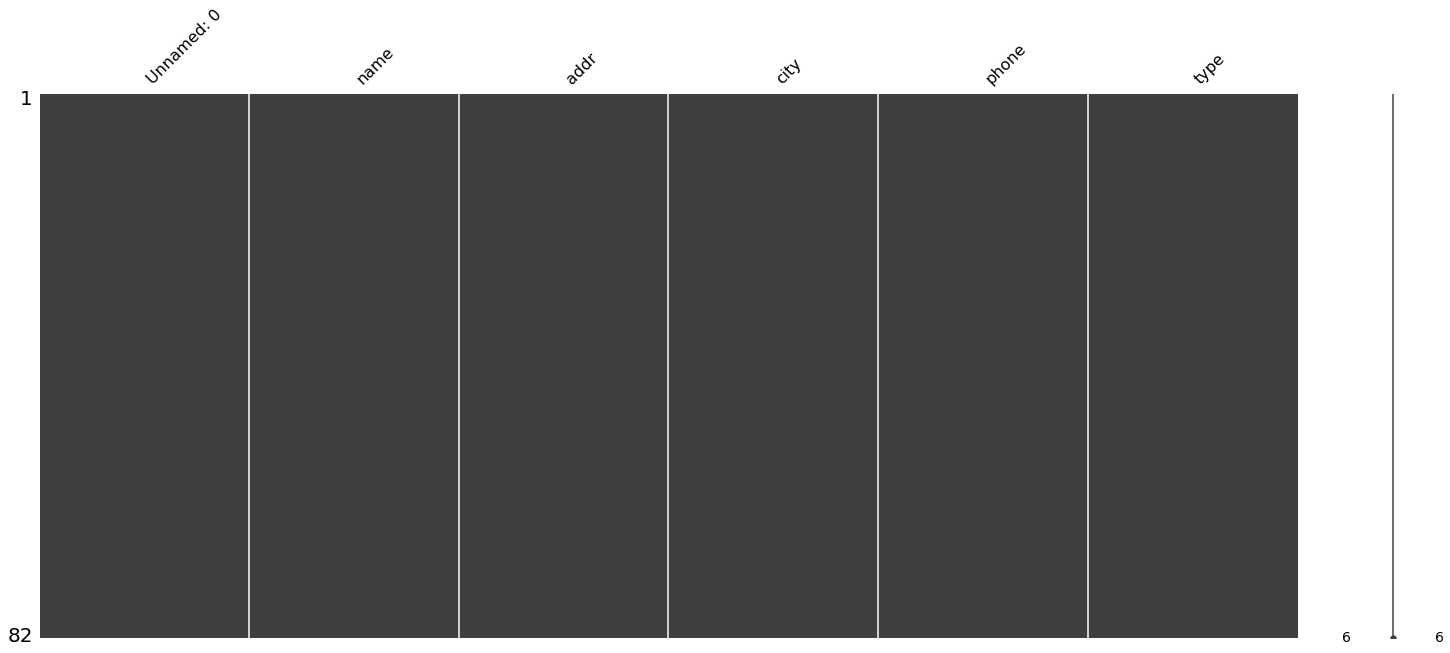

In [24]:
msno.matrix(df) # If there are missing data points there will be white horizontal stripes across an affected column.
plt.show()

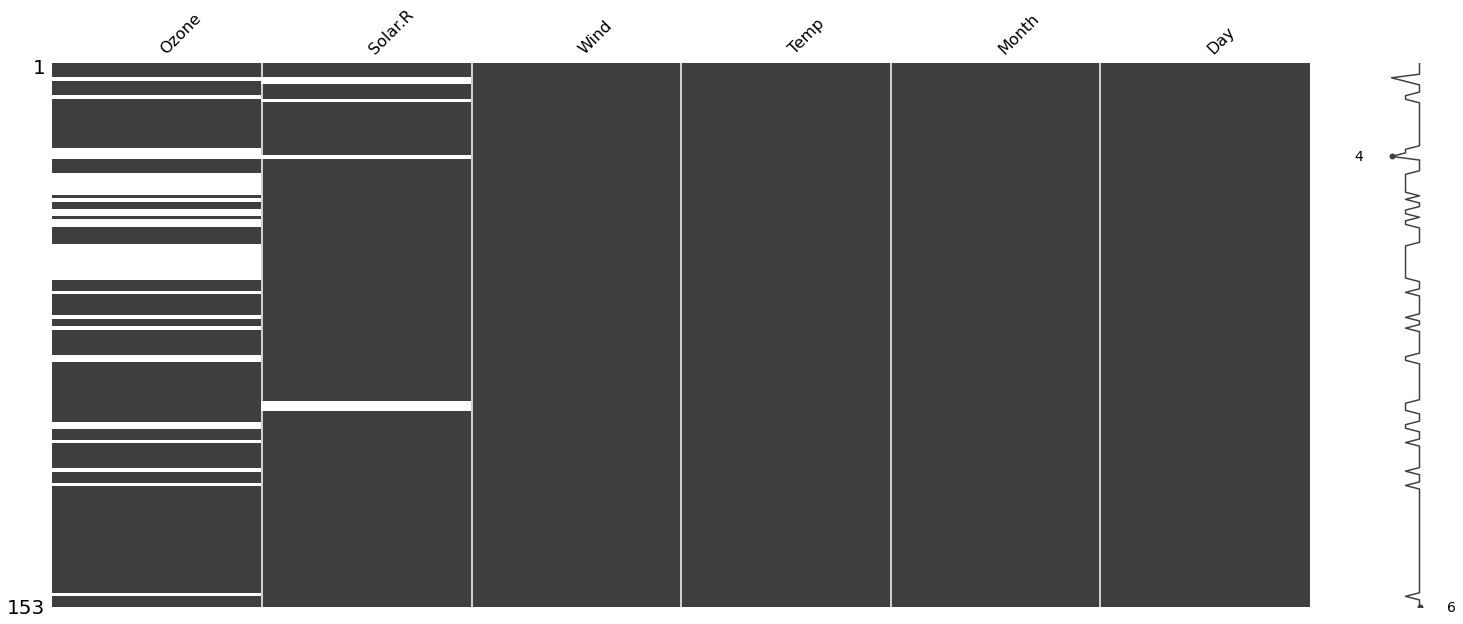

In [27]:
air_quality = pd.read_csv('airquality.csv')
msno.matrix(df) 
plt.show()

In [0]:
missing = air_quality[air_quality['Ozone'].isna()]
complete = air_quality[~air_quality['Ozone'].isna()]

In [30]:
missing.shape, complete.shape

((37, 6), (116, 6))

In [31]:
missing.describe(), complete.describe()

(       Ozone     Solar.R       Wind       Temp      Month        Day
 count    0.0   35.000000  37.000000  37.000000  37.000000  37.000000
 mean     NaN  189.514286  10.256757  77.918919   6.351351  16.648649
 std      NaN   87.694782   3.385142   9.531755   0.977986   9.286239
 min      NaN   31.000000   1.700000  56.000000   5.000000   1.000000
 25%      NaN  131.000000   8.000000  75.000000   6.000000  10.000000
 50%      NaN  194.000000   9.700000  79.000000   6.000000  15.000000
 75%      NaN  261.500000  12.600000  84.000000   7.000000  25.000000
 max      NaN  332.000000  16.600000  93.000000   9.000000  30.000000,
             Ozone     Solar.R        Wind        Temp       Month         Day
 count  116.000000  111.000000  116.000000  116.000000  116.000000  116.000000
 mean    42.129310  184.801802    9.862069   77.870690    7.198276   15.534483
 std     32.987885   91.152302    3.574856    9.485486    1.475715    8.750087
 min      1.000000    7.000000    2.300000   57.00000

In [0]:
banking = pd.read_csv('banking_dirty.csv')

Unnamed: 0          100
cust_id             100
birth_date          100
Age                 100
acct_amount         100
inv_amount          100
fund_A              100
fund_B              100
fund_C              100
fund_D              100
account_opened      100
last_transaction    100
dtype: int64
Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64
Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


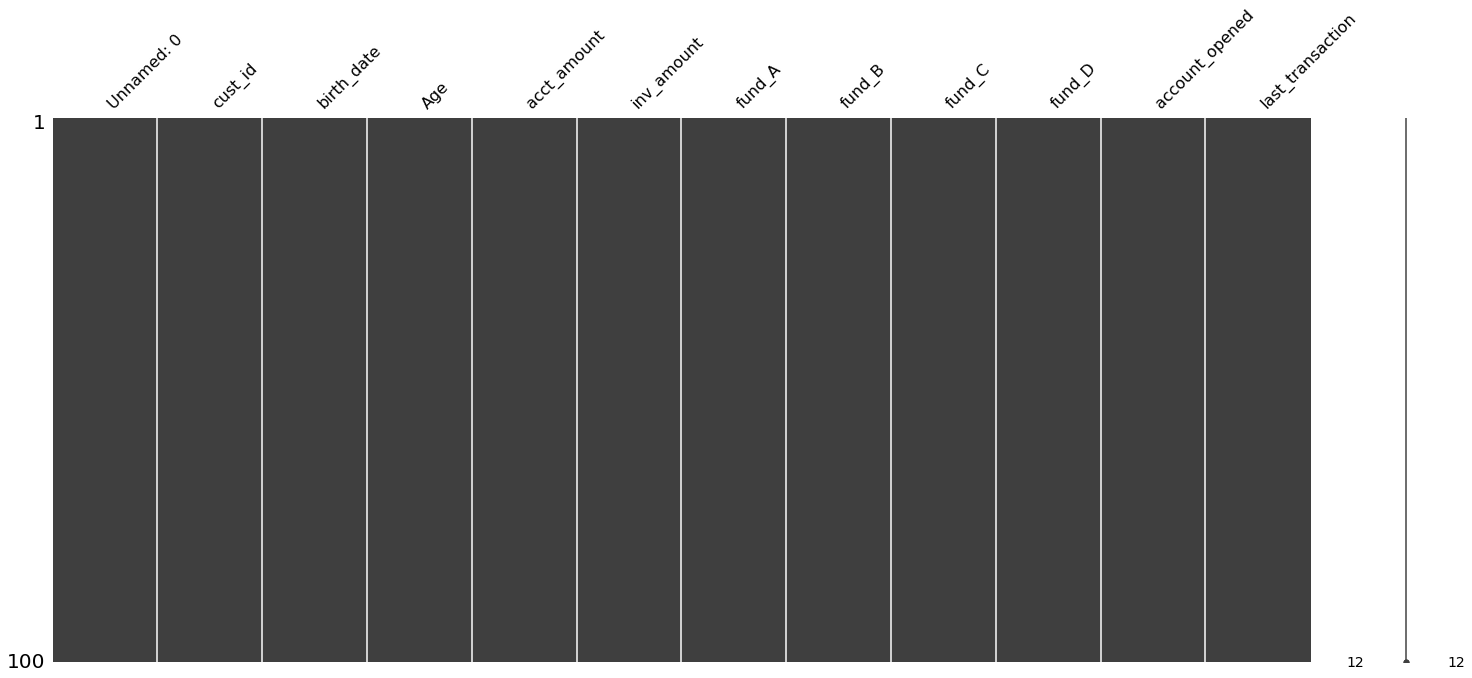

In [35]:

# Print number of missing values in banking
print(banking.isna().count())
print(banking.isna().sum(axis=0))
print(banking.isna().sum(axis=0))
# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [0]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

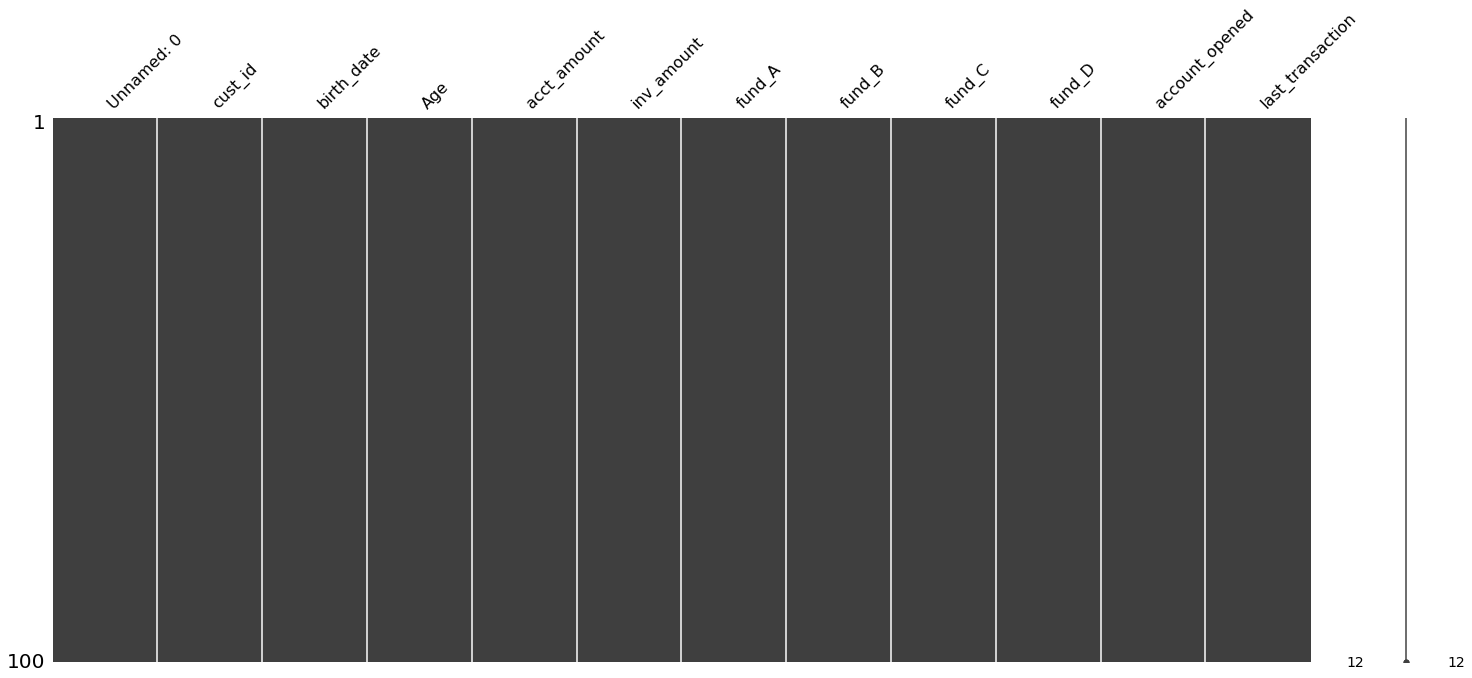

In [38]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values('Age')
msno.matrix(banking_sorted)
plt.show()

In [40]:

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid.inv_amount * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


# Record Linkage
### Comparing Strings
minimum edit distance: min num steps to go from one word to another.
Levenshtein distance, insertion, deltion, substitution.

In [43]:
!pip install fuzzywuzzy

In [44]:
from fuzzywuzzy import fuzz
fuzz.WRatio('Reeding','Reading')

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


86

In [46]:
restaurants = pd.read_csv('restaurants_L2_dirty.csv')
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [48]:
from fuzzywuzzy import process
# Store the unique values of cuisine_type in unique_types
unique_types = restaurants.type.unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

In [50]:
''' Code for convertin cuisine type with a df of correct cuisine types'''
# For each correct cuisine_type in categories
for cuisine in categories['cuisine_type']:
  # Find matches in cuisine_type of restaurants
  matches = process.extract(cuisine, restaurants['cuisine_type'], 
                            limit = restaurants.shape[0])
  
  # For each possible_match with similarity score >= 80
  for possible_match in matches:
    if possible_match[1] >= 80:
      # Find matching cuisine type
      matching_cuisine = restaurants['cuisine_type'] == possible_match[0]
      restaurants.loc[matching_cuisine, 'cuisine_type'] = cuisine

# Print unique values to confirm mapping
print(restaurants['cuisine_type'].unique())

KeyError: ignored

### Generating Pairs
Record linkage: linking the same information that is in different variations in different dataframes.

In [4]:
!pip install recordlinkage

     |████████████████████████████████| 952kB 2.8MB/s 
     |████████████████████████████████| 102kB 6.8MB/s 


In [0]:
import recordlinkage

In [0]:
indexer = recordlinkage.Index()

In [0]:
# Generate pairs
indexer.block(chosen_column)
pairs = indexer.index(df1, df2)
print(pairs)

In [0]:
# Create Comparison object
comparison = recordlinkage.Compare()

# Find exact matches of chosen columns
comparison.exact('col1','col1',label='col1')
comparison.exact('col2','col2',label='col2')

# Find similar matches
comparison.string('col3','col3', threshold=0.85, label='col3')
comparison.string('col4','col4', threshold=0.85, label='col4')

# Find matches
potential_matches = comparison.compute(pairs, df1, df2) 

In [0]:
import pandas as pd
restaurants = pd.read_csv('restaurants_L2_dirty.csv')

In [0]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

### Linking Dataframes